In [1]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error

def split_x_and_y(database,x,y):
  dataset_x = database[x]
  dataset_y = database[y]
  return dataset_x,dataset_y


def scores(Y_true, Y_predicted):
  r2 = r2_score(Y_true, Y_predicted)
  meansquarederror = mean_squared_error(Y_true, Y_predicted)
  meanabsoluteerror = mean_absolute_error(Y_true, Y_predicted)
  maxerror = max_error(Y_true, Y_predicted)

  print('r2:',r2,'meansquarederror:',meansquarederror,'meanabsoluteerror:',meanabsoluteerror,'maxerror:',maxerror)
  return r2,meansquarederror,meanabsoluteerror,maxerror

# TMAX

In [2]:
import pandas as pd
database_pre = pd.read_excel('database_TCC.xlsx')
database = database_pre[['A','E','N','Tmax']]
database

,A,E,N,Tmax
0,25,1,11,67.67
1,25,1,5,126.85
2,25,2,8,72.71
3,25,3,11,162.85
4,25,3,5,94.85
5,35,1,8,61.15
6,35,2,11,63.03
7,35,2,5,77.35
8,35,3,8,63.25
9,25,1,8,76.30


In [3]:
import pickle

with open("standard_scaler_Tmax.pkl", "rb") as f:
    rawdata = f.read()

standard_scaler_tmax = pickle.loads(rawdata)
data = standard_scaler_tmax.transform(database)
database = pd.DataFrame(data,columns=database.columns)

### Random Forest Regressor

In [4]:
with open("Random_Forest_Regressor_Tmax.pkl", "rb") as f:
    rawdata = f.read()
random_forest_regressor_tmax = pickle.loads(rawdata)

In [5]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

random_forest_regressor_tmax.score(test_x,test_y)

0.705381030773407

In [6]:
random_forest_regressor_tmax.feature_importances_

array([0.21146886, 0.38204248, 0.40648866])

In [7]:
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = random_forest_regressor_tmax.predict(test_x)
desnormalizado_teste = standard_scaler_tmax.inverse_transform(desnormalizar)
desnormalizado_teste

array([[25.        ,  1.        ,  8.        , 85.44523333],
       [25.        ,  2.        ,  5.        , 98.25708667],
       [35.        ,  3.        , 11.        , 95.42086667]])

In [8]:
random_forest_regressor_result = desnormalizado_teste[:,-1]

In [9]:
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = test_y
desnormalizado_resultado = standard_scaler_tmax.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.  ,  1.  ,  8.  , 76.3 ],
       [25.  ,  2.  ,  5.  , 98.76],
       [35.  ,  3.  , 11.  , 94.7 ]])

### Keras

In [10]:
from keras.models import load_model
keras_tmax = load_model('keras_model_Tmax.h5')

dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Tmax')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Tmax')

In [11]:
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = keras_tmax.predict(test_x.values)
desnormalizado_teste = standard_scaler_tmax.inverse_transform(desnormalizar)
desnormalizado_teste

1/1 [==============================] - 0s 100ms/step


array([[ 25.        ,   1.        ,   8.        ,  81.46868287],
       [ 25.        ,   2.        ,   5.        , 103.4628658 ],
       [ 35.        ,   3.        ,  11.        ,  93.59394363]])

In [12]:
keras_results = desnormalizado_teste[:,-1]

In [13]:
desnormalizar = test_x.copy()
desnormalizar['Tmax'] = test_y
desnormalizado_resultado = standard_scaler_tmax.inverse_transform(desnormalizar)
desnormalizado_resultado

answers = desnormalizado_resultado[:,-1]

In [14]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.825284923165511 meansquarederror: 16.68519665631939 meanabsoluteerror: 3.659201678113812 maxerror: 5.168682866543691


(0.825284923165511, 16.68519665631939, 3.659201678113812, 5.168682866543691)

# RESULTS

In [15]:
df_results_tmax = pd.DataFrame(database_pre.iloc[[9,10,11]][['A','E','N','Tmax']])
df_results_tmax['Random Forest Regressor'] = random_forest_regressor_result
df_results_tmax['Keras'] = keras_results

In [16]:
df_results_tmax

,A,E,N,Tmax,Random Forest Regressor,Keras
9,25,1,8,76.30,85.445233,81.468683
10,25,2,5,98.76,98.257087,103.462866
11,35,3,11,94.70,95.420867,93.593944


In [17]:
df_results_tmax['average'] = df_results_tmax[['Random Forest Regressor','Keras']].mean(axis=1)

In [18]:
df_results_tmax

,A,E,N,Tmax,Random Forest Regressor,Keras,average
9,25,1,8,76.30,85.445233,81.468683,83.456958
10,25,2,5,98.76,98.257087,103.462866,100.859976
11,35,3,11,94.70,95.420867,93.593944,94.507405


In [19]:
scores(df_results_tmax['Tmax'],df_results_tmax['average'])

r2: 0.8056916122602655 meansquarederror: 18.556347398004522 meanabsoluteerror: 3.149843061279133 maxerror: 7.156958099938549


(0.8056916122602655, 18.556347398004522, 3.149843061279133, 7.156958099938549)

In [20]:
df_delta_tmax = pd.DataFrame(database_pre.iloc[[9,10,11]][['A','E','N','Tmax']])
df_delta_tmax['Random Forest Regressor'] = (abs((df_results_tmax['Random Forest Regressor'] - df_results_tmax['Tmax'])/df_results_tmax['Tmax'])*100).round(2)
df_delta_tmax['Keras'] = (abs((df_results_tmax['Keras'] - df_results_tmax['Tmax'])/df_results_tmax['Tmax'])*100).round(2)
df_delta_tmax['average'] = (abs((df_results_tmax['average'] - df_results_tmax['Tmax'])/df_results_tmax['Tmax'])*100).round(2)

In [21]:
df_delta_tmax[['Random Forest Regressor','Keras','average']] = df_delta_tmax[['Random Forest Regressor','Keras','average']].applymap(lambda x: str(x) + '%')

In [22]:
df_delta_tmax

,A,E,N,Tmax,Random Forest Regressor,Keras,average
9,25,1,8,76.30,11.99%,6.77%,9.38%
10,25,2,5,98.76,0.51%,4.76%,2.13%
11,35,3,11,94.70,0.76%,1.17%,0.2%


In [23]:
A = 25
E = 1
N = 11
NU = 0

list_of_outcomes = []

for N in [4,5,6,7,8,9,10,11]:
    # print(N)
    normalizado = standard_scaler_tmax.transform([[A,E,N,NU]])[:,:3]
    resultado = keras_tmax.predict(normalizado)
    print(normalizado, resultado)
    
    resultado_df = pd.DataFrame(normalizado,columns=['A','E','N'])
    resultado_df['Nu'] = resultado

    standard_scaler_tmax.inverse_transform(resultado_df)
    outcome = list(standard_scaler_tmax.inverse_transform(resultado_df)[0])

    list_of_outcomes.append(outcome)

dataframe_output = pd.DataFrame(list_of_outcomes,columns=['A','E','N','Nu'])
dataframe_output

1/1 [==============================] - 0s 16ms/step
[[-0.84515425 -1.22474487 -1.63299316]] [[1.7013477]]
1/1 [==============================] - 0s 15ms/step
[[-0.84515425 -1.22474487 -1.22474487]] [[1.32378]]
1/1 [==============================] - 0s 17ms/step
[[-0.84515425 -1.22474487 -0.81649658]] [[0.8965406]]
1/1 [==============================] - 0s 14ms/step


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[-0.84515425 -1.22474487 -0.40824829]] [[0.37102002]]
1/1 [==============================] - 0s 15ms/step
[[-0.84515425 -1.22474487  0.        ]] [[-0.23425297]]
1/1 [==============================] - 0s 17ms/step
[[-0.84515425 -1.22474487  0.40824829]] [[-0.5967901]]
1/1 [==============================] - 0s 18ms/step
[[-0.84515425 -1.22474487  0.81649658]] [[-0.7222469]]
1/1 [==============================] - 0s 17ms/step
[[-0.84515425 -1.22474487  1.22474487]] [[-0.7110329]]


C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\vinao\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,A,E,N,Nu
0,25.0,1.0,4.0,137.825425
1,25.0,1.0,5.0,126.832203
2,25.0,1.0,6.0,114.392747
3,25.0,1.0,7.0,99.091746
4,25.0,1.0,8.0,81.468682
5,25.0,1.0,9.0,70.913090
6,25.0,1.0,10.0,67.260303
7,25.0,1.0,11.0,67.586808


A: 25 E: 1 N: 11 Nu: 0


<AxesSubplot:xlabel='N', ylabel='Nu'>

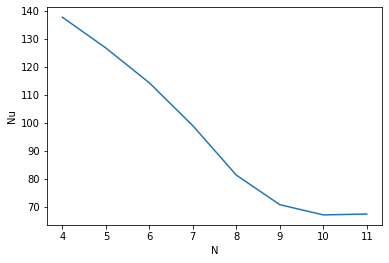

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

print('A:',A,'E:',E,'N:',N,'Nu:',NU)
sns.lineplot(x="N", y='Nu',data=dataframe_output,ci=None)